# A. Data Cleaning and Transformation (Python)

### 1. Load & Explore Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [80]:
# Load the dataset

df = pd.read_csv('datasets\kakuma_healthcare_visits.csv')
df.head(5)


,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability
0,VS0001,Male,63.0,NaN,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage
2,VS0003,Male,33.0,NaN,Kalobeyei Clinic,Cough,2025-06-07,Available
3,VS0004,Male,29.0,NaN,Kalobeyei Clinic,Skin Infection,2025-06-22,Available
4,VS0005,Male,13.0,NaN,UNHCR Mobile Unit,Check-up,2025-06-10,Available


In [33]:
# Initial exploration

print(healthcare.head())
print(healthcare.info())
print(healthcare.describe())




  Visit_ID  Gender   Age      Zone                Clinic  \
0   VS0001    Male  63.0       NaN  Kakuma Health Center   
1   VS0002  Female  17.0  Kakuma 3      Kalobeyei Clinic   
2   VS0003    Male  33.0       NaN      Kalobeyei Clinic   
3   VS0004    Male  29.0       NaN      Kalobeyei Clinic   
4   VS0005    Male  13.0       NaN     UNHCR Mobile Unit   

            Visit_Reason  Visit_Date Medicine_Availability  
0  Respiratory Infection  2025-06-27              Shortage  
1  Respiratory Infection  2025-06-04              Shortage  
2                  Cough  2025-06-07             Available  
3         Skin Infection  2025-06-22             Available  
4               Check-up  2025-06-10             Available  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Visit_ID               1000 non-null   object 
 1   Gender 

### 2.Data Cleaning

In [127]:
# Check for missing values
print(df.isnull().sum())

Visit_ID                 0
Gender                   0
Age                      0
Zone                     0
Clinic                   0
Visit_Reason             0
Visit_Date               0
Medicine_Availability    0
Age_Group                0
Illness_Category         0
Visit_Week               0
Visit_Month              0
dtype: int64


In [104]:
df['Gender'] = df['Gender'].bfill()
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [105]:
df['Clinic'] = df['Clinic'].bfill()
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [106]:
# Handle missing values

# For Visit_Date, we'll keep as is since temporal analysis is important but we can't impute dates

# For Zone, we'll create an "Unknown" category
df['Zone'] = df['Zone'].bfill()
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [107]:
# For Age, we'll impute with median (better than mean for age data)
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [108]:
# For Visit_Reason, we'll create an "Unknown" category
df['Visit_Reason'] = df['Visit_Reason'].ffill()
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [109]:
# For Medicine_Availability, we'll create an "Unknown" category
df['Medicine_Availability'] = df['Medicine_Availability'].ffill()
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [110]:
# Convert Visit_Date to datetime format
df['Visit_Date'] = pd.to_datetime(df['Visit_Date'], errors='coerce')
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [111]:
# fill missing date values
df['Visit_Date'] = df['Visit_Date'].ffill()
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [112]:
# Create age groups for better analysis

bins = [0, 5, 18, 35, 50, 65, 100]
labels = ['0-5', '6-18', '19-35', '36-50', '51-65', '66+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


In [113]:
# Categorize visit reasons into broader illness types

def categorize_reason(reason):
    reason = str(reason).lower()
    if 'respiratory' in reason or 'cough' in reason:
        return 'Respiratory'
    elif 'skin' in reason:
        return 'Skin Infection'
    elif 'wound' in reason:
        return 'Wounds/Injuries'
    elif 'malaria' in reason:
        return 'Malaria'
    elif 'diarrhea' in reason:
        return 'Gastrointestinal'
    elif 'maternity' in reason:
        return 'Maternity'
    elif 'check-up' in reason:
        return 'Check-up'
    else:
        return 'Other/Unknown'

df['Illness_Category'] = df['Visit_Reason'].apply(categorize_reason)

df.head(5)

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6.0
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6.0
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6.0
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6.0
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6.0


### 3. Data Transformation

In [114]:
# Extract week and month from Visit_Date for temporal analysis

df['Visit_Week'] = df['Visit_Date'].dt.isocalendar().week
df['Visit_Month'] = df['Visit_Date'].dt.month
df.head()


,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6


In [115]:
# Create a summary dataframe for clinic utilization

clinic_utilization = df.groupby(['Clinic', 'Zone']).agg(
    Total_Visits=('Visit_ID', 'count'),
    Respiratory=('Illness_Category', lambda x: (x == 'Respiratory').sum()),
    Skin_Infection=('Illness_Category', lambda x: (x == 'Skin Infection').sum()),
    Wounds=('Illness_Category', lambda x: (x == 'Wounds/Injuries').sum()),
    Malaria=('Illness_Category', lambda x: (x == 'Malaria').sum()),
    Gastrointestinal=('Illness_Category', lambda x: (x == 'Gastrointestinal').sum()),
    Maternity=('Illness_Category', lambda x: (x == 'Maternity').sum()),
    Check_up=('Illness_Category', lambda x: (x == 'Check-up').sum())
).reset_index()

clinic_utilization.head()

,Clinic,Zone,Total_Visits,Respiratory,Skin_Infection,Wounds,Malaria,Gastrointestinal,Maternity,Check_up
0,Kakuma Health Center,Kakuma 1,65,21,9,4,10,7,6,6
1,Kakuma Health Center,Kakuma 2,54,11,5,6,5,3,7,10
2,Kakuma Health Center,Kakuma 3,66,18,6,5,5,11,8,5
3,Kakuma Health Center,Kakuma 4,87,17,10,9,11,16,10,6
4,Kakuma Health Center,Kalobeyei,84,13,12,5,10,12,10,14


In [116]:
# Medicine availability analysis

medicine_availability = df.groupby(['Clinic', 'Illness_Category']).agg(
    Total_Visits=('Visit_ID', 'count'),
    Available=('Medicine_Availability', lambda x: (x == 'Available').sum()),
    Shortage=('Medicine_Availability', lambda x: (x == 'Shortage').sum()),
    Out_of_Stock=('Medicine_Availability', lambda x: (x == 'Out of Stock').sum()),
    Unknown=('Medicine_Availability', lambda x: (x == 'Unknown').sum())
).reset_index()

medicine_availability.head()


,Clinic,Illness_Category,Total_Visits,Available,Shortage,Out_of_Stock,Unknown
0,Kakuma Health Center,Check-up,41,14,18,9,0
1,Kakuma Health Center,Gastrointestinal,49,17,16,16,0
2,Kakuma Health Center,Malaria,41,13,16,12,0
3,Kakuma Health Center,Maternity,41,12,13,16,0
4,Kakuma Health Center,Other/Unknown,33,10,11,12,0


In [117]:
# Temporal trends

temporal_trends = df.groupby(['Visit_Month', 'Visit_Week', 'Illness_Category']).agg(
    Visit_Count=('Visit_ID', 'count')
).reset_index()

temporal_trends.head()

,Visit_Month,Visit_Week,Illness_Category,Visit_Count
0,6,22,Check-up,3
1,6,22,Gastrointestinal,2
2,6,22,Malaria,4
3,6,22,Maternity,2
4,6,22,Other/Unknown,1


# B. Data Analysis & Insights
### 1. Most Utilized Clinics

Top 5 Clinics by Visit Volume:
Clinic
Kakuma Health Center    356
UNHCR Mobile Unit       328
Kalobeyei Clinic        316
Name: count, dtype: int64


C:\Users\len\AppData\Local\Temp\ipykernel_10628\360988941.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clinics.values, y=top_clinics.index, palette='viridis')


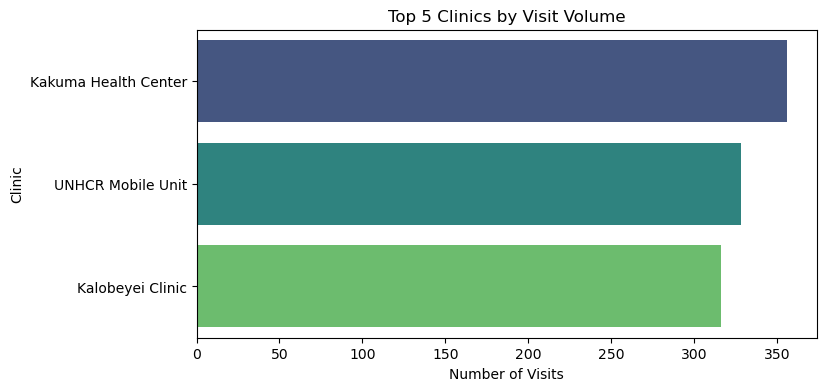

In [118]:
# Top clinics by visit volume
top_clinics = df['Clinic'].value_counts().head(5)
print("Top 5 Clinics by Visit Volume:")
print(top_clinics)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_clinics.values, y=top_clinics.index, palette='viridis')
plt.title('Top 5 Clinics by Visit Volume')
plt.xlabel('Number of Visits')
plt.ylabel('Clinic')
plt.show()

### 2. Common Illnesses and Health Concerns


Most Common Illness Categories:
Illness_Category
Respiratory         227
Malaria             124
Gastrointestinal    121
Maternity           109
Skin Infection      108
Check-up            107
Wounds/Injuries     104
Other/Unknown       100
Name: count, dtype: int64


C:\Users\len\AppData\Local\Temp\ipykernel_10628\4154759396.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_illnesses.values, y=common_illnesses.index, palette='magma')


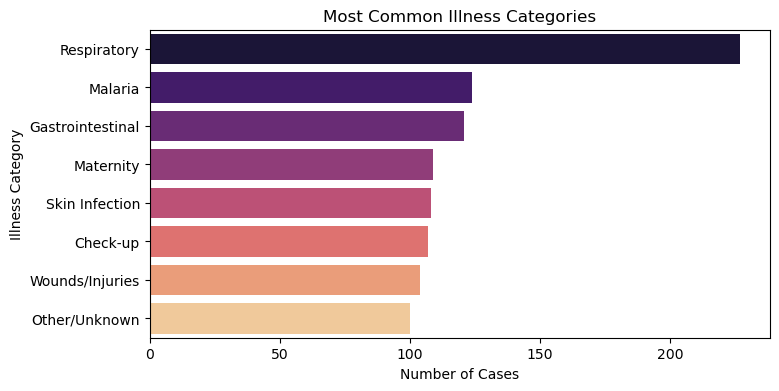


Common Illnesses by Zone:
Illness_Category  Check-up  Gastrointestinal  Malaria  Maternity  \
Zone                                                               
Kakuma 1                12                24       28         20   
Kakuma 2                27                15       23         24   
Kakuma 3                18                26       23         20   
Kakuma 4                23                31       24         25   
Kalobeyei               27                25       26         20   

Illness_Category  Other/Unknown  Respiratory  Skin Infection  Wounds/Injuries  
Zone                                                                           
Kakuma 1                     16           51              23               16  
Kakuma 2                     15           52              14               27  
Kakuma 3                     16           42              20               19  
Kakuma 4                     26           40              27               24  
Kalobeyei       

In [119]:
# Most common illness categories

common_illnesses = df['Illness_Category'].value_counts()
print("\nMost Common Illness Categories:")
print(common_illnesses)

plt.figure(figsize=(8, 4))
sns.barplot(x=common_illnesses.values, y=common_illnesses.index, palette='magma')
plt.title('Most Common Illness Categories')
plt.xlabel('Number of Cases')
plt.ylabel('Illness Category')
plt.show()

# Common illnesses by zone
zone_illness = pd.crosstab(df['Zone'], df['Illness_Category'])
print("\nCommon Illnesses by Zone:")
print(zone_illness)

### 3. Medicine Availability and Usage


Medicine Availability Status (%):
Medicine_Availability
Out of Stock    35.5
Available       32.5
Shortage        32.0
Name: proportion, dtype: float64


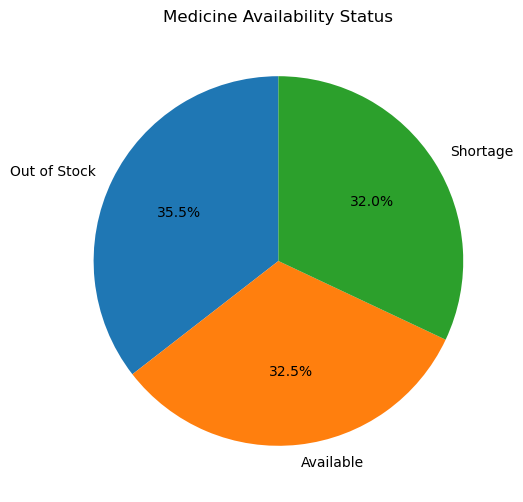

In [120]:
# Medicine availability status

medicine_status = df['Medicine_Availability'].value_counts(normalize=True) * 100
print("\nMedicine Availability Status (%):")
print(medicine_status)

plt.figure(figsize=(6, 6))
plt.pie(medicine_status, labels=medicine_status.index, autopct='%1.1f%%', startangle=90)
plt.title('Medicine Availability Status')
plt.show()


Medicine Availability by Illness Category (%):
Medicine_Availability  Available  Out of Stock   Shortage
Illness_Category                                         
Check-up               30.841121     29.906542  39.252336
Gastrointestinal       29.752066     28.925620  41.322314
Malaria                32.258065     32.258065  35.483871
Maternity              35.779817     37.614679  26.605505
Other/Unknown          33.000000     44.000000  23.000000
Respiratory            34.361233     35.682819  29.955947
Skin Infection         34.259259     39.814815  25.925926
Wounds/Injuries        27.884615     37.500000  34.615385


<Figure size 1000x600 with 0 Axes>

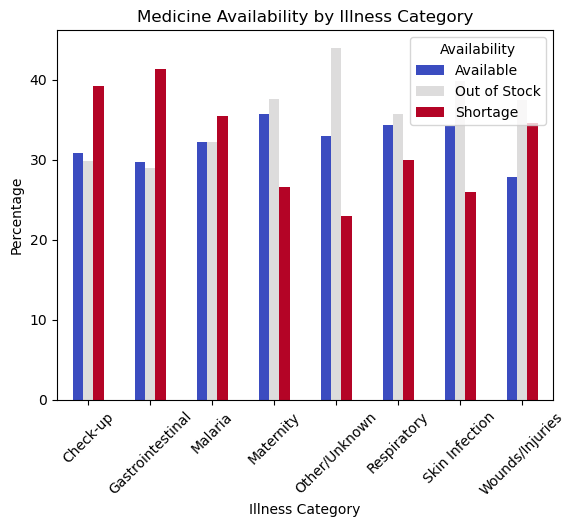

In [121]:
# Medicine availability by illness category

illness_medicine = pd.crosstab(df['Illness_Category'], df['Medicine_Availability'], normalize='index') * 100
print("\nMedicine Availability by Illness Category (%):")
print(illness_medicine)

plt.figure(figsize=(10, 6))
illness_medicine.plot(kind='bar',  colormap='coolwarm')
plt.title('Medicine Availability by Illness Category')
plt.ylabel('Percentage')
plt.xlabel('Illness Category')
plt.xticks(rotation=45)
plt.legend(title='Availability', loc='upper right')
plt.show()

### 4. Healthcare Trends by Demographics


Visits by Age Group:
Age_Group
0-5       55
6-18     178
19-35    214
36-50    295
51-65    204
66+       54
Name: count, dtype: int64


C:\Users\len\AppData\Local\Temp\ipykernel_10628\796470349.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_visits.index, y=age_visits.values, palette='plasma')


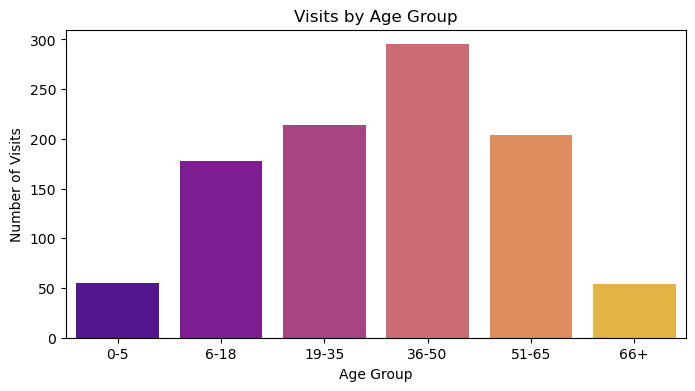

In [122]:
# Visits by age group
age_visits = df['Age_Group'].value_counts().sort_index()
print("\nVisits by Age Group:")
print(age_visits)

plt.figure(figsize=(8, 4))
sns.barplot(x=age_visits.index, y=age_visits.values, palette='plasma')
plt.title('Visits by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Visits')
plt.show()


Illness Categories by Gender (%):
Illness_Category   Check-up  Gastrointestinal    Malaria  Maternity  \
Gender                                                                
Female            10.763209          10.37182  12.133072  11.741683   
Male              10.633947          13.90593  12.678937  10.020450   

Illness_Category  Other/Unknown  Respiratory  Skin Infection  Wounds/Injuries  
Gender                                                                         
Female                12.133072    23.091977        9.980431         9.784736  
Male                   7.770961    22.290389       11.656442        11.042945  


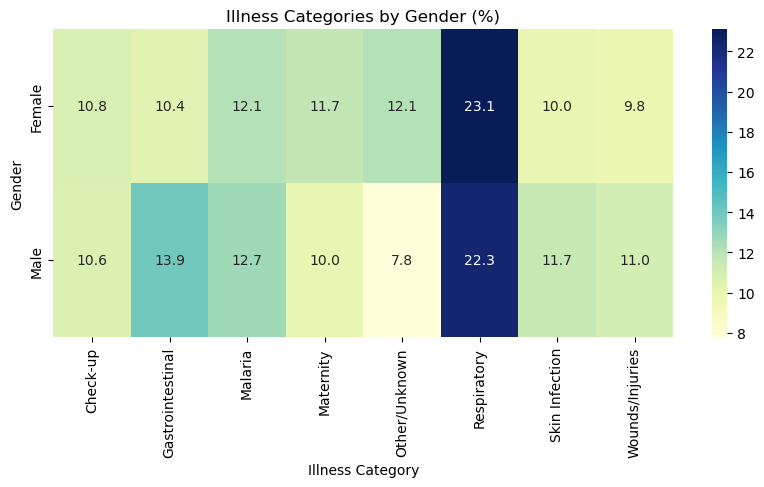

In [123]:
# Illness categories by gender
gender_illness = pd.crosstab(df['Gender'], df['Illness_Category'], normalize='index') * 100
print("\nIllness Categories by Gender (%):")
print(gender_illness)

plt.figure(figsize=(10, 4))
sns.heatmap(gender_illness, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Illness Categories by Gender (%)')
plt.ylabel('Gender')
plt.xlabel('Illness Category')
plt.show()

### 5. Temporal Trends in Healthcare Demand


Monthly Visit Trends:
Visit_Month
6    953
7     47
Name: Visit_ID, dtype: int64


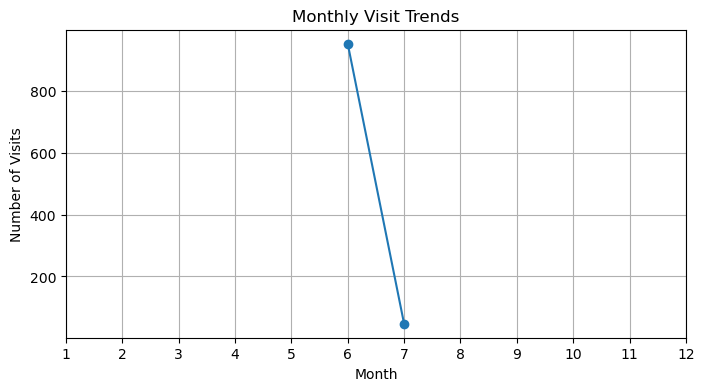

In [124]:
# Monthly visit trends

monthly_trends = df.groupby('Visit_Month')['Visit_ID'].count()
print("\nMonthly Visit Trends:")
print(monthly_trends)

plt.figure(figsize=(8, 4))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Visit Trends')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(range(1, 13))
plt.grid()
plt.show()



Weekly Trends for Top Illness Categories:
Illness_Category  Gastrointestinal  Malaria  Respiratory
Visit_Week                                              
22                               2        4            4
23                              26       28           49
24                              29       32           56
25                              21       26           61
26                              34       23           43


<Figure size 1000x400 with 0 Axes>

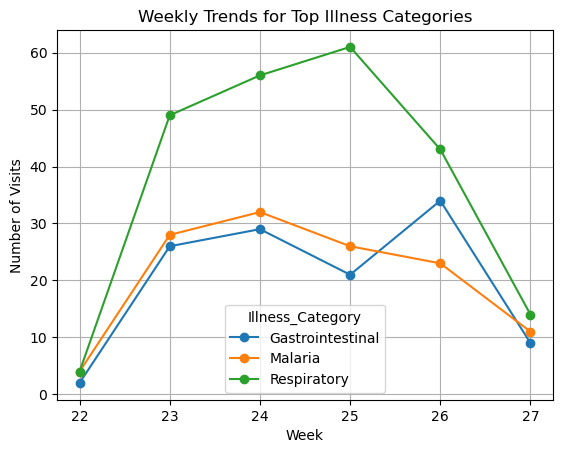

In [125]:
# Weekly trends for top illness categories

top_illnesses = df['Illness_Category'].value_counts().head(3).index
weekly_illness = df[df['Illness_Category'].isin(top_illnesses)].groupby(['Visit_Week', 'Illness_Category'])['Visit_ID'].count().unstack()
print("\nWeekly Trends for Top Illness Categories:")
print(weekly_illness.head())

plt.figure(figsize=(10, 4))
weekly_illness.plot(kind='line', marker='o')
plt.title('Weekly Trends for Top Illness Categories')
plt.xlabel('Week')
plt.ylabel('Number of Visits')
plt.grid()
plt.show()

In [126]:
df.to_csv('datasets\clean_kakuma_healthcare_visits.csv')

In [128]:
df.head()

,Visit_ID,Gender,Age,Zone,Clinic,Visit_Reason,Visit_Date,Medicine_Availability,Age_Group,Illness_Category,Visit_Week,Visit_Month
0,VS0001,Male,63.0,Kakuma 3,Kakuma Health Center,Respiratory Infection,2025-06-27,Shortage,51-65,Respiratory,26,6
1,VS0002,Female,17.0,Kakuma 3,Kalobeyei Clinic,Respiratory Infection,2025-06-04,Shortage,6-18,Respiratory,23,6
2,VS0003,Male,33.0,Kakuma 3,Kalobeyei Clinic,Cough,2025-06-07,Available,19-35,Respiratory,23,6
3,VS0004,Male,29.0,Kakuma 3,Kalobeyei Clinic,Skin Infection,2025-06-22,Available,19-35,Skin Infection,25,6
4,VS0005,Male,13.0,Kakuma 3,UNHCR Mobile Unit,Check-up,2025-06-10,Available,6-18,Check-up,24,6
